#  An Individual's Likelihood on Making Over/Under $50K Based on Categorical Features

In [138]:
# Importing Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats 
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Data Cleaning and Preparation

A portion of the data cleaning/preparation process involved converting the data into a csv file.<br>

For this project, we'll be using the education, race, income features to evaluate if race and education level significantly effects an individual's likelihood of earning over or under $50,000 per year.<br>

Below is a filtered version of the census dataset that only includes the filtered feature columns.<br>

In [139]:
# Reading in the census csv as a dataframe
census = pd.read_csv('census.csv', usecols=['income','education','race','marital-status','native-country'])

# The strip function was used because there was an extra white space in the race column 
census['race'] = census['race'].str.strip()
census['income'] =  census['income'].str.strip()

census

,education,marital-status,race,native-country,income
0,Bachelors,Married-civ-spouse,White,United-States,<=50K
1,HS-grad,Divorced,White,United-States,<=50K
2,11th,Married-civ-spouse,Black,United-States,<=50K
3,Bachelors,Married-civ-spouse,Black,Cuba,<=50K
4,Masters,Married-civ-spouse,White,United-States,<=50K
...,...,...,...,...,...
32555,Assoc-acdm,Married-civ-spouse,White,United-States,<=50K
32556,HS-grad,Married-civ-spouse,White,United-States,>50K
32557,HS-grad,Widowed,White,United-States,<=50K
32558,HS-grad,Never-married,White,United-States,<=50K


## Exploratory Data Analysis

Immediately, we notice that there are far more observations for white individuals than any other race in the dataset. <br>

Therefore, we'll take a random sample of 150 individuals from each race to fairly conduct our statistical analysis.

In [140]:
census['race'].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [141]:
# Gathering Sample Data by Race

# Replace parameter is used to ensure all 150 samples are unique. Random seed is used for reproducibility
np.random.seed(0)

white_sample = census[census['race'] == 'White'].sample(n=150, replace=False)
black_sample = census[census['race'] == 'Black'].sample(n=150, replace=False)
asian_sample = census[census['race'] == 'Asian-Pac-Islander'].sample(n=150, replace=False)
indian_sample = census[census['race'] == 'Amer-Indian-Eskimo'].sample(n=150, replace=False)

sample_dataframe = pd.concat([white_sample, black_sample,asian_sample,indian_sample])

sample_dataframe

,education,marital-status,race,native-country,income
9720,Masters,Divorced,White,United-States,<=50K
1681,Bachelors,Married-civ-spouse,White,United-States,>50K
24467,9th,Widowed,White,United-States,<=50K
19847,Some-college,Separated,White,United-States,<=50K
14468,Masters,Divorced,White,United-States,<=50K
...,...,...,...,...,...
19758,HS-grad,Never-married,Amer-Indian-Eskimo,United-States,<=50K
17780,Doctorate,Married-spouse-absent,Amer-Indian-Eskimo,United-States,<=50K
19136,HS-grad,Separated,Amer-Indian-Eskimo,United-States,<=50K
30578,11th,Never-married,Amer-Indian-Eskimo,United-States,<=50K


## Model Selection and Analysis

Before conducting data visualizations on the samples from the census population, we'll first declare a null and alternative hypotheis followed by a Pearson's chi-squared test for independence.  <br><br>
$H_0$: There is no relation between the categorical feature and income.<br>
$H_\alpha$ : There is a relation between the categorical feature and income. <br>

It is important to note that we will be conducting the chi-squared test with income and one categorical feature at a time. We are not testing the relationship between income and all categorical features simulatenously.

We will verify our hypothesis using: p-value

### Chi-Square Test

In [155]:
# Setting our P-value/significance level
significance_level = 0.05

# Education + Income Crosstab
ed_income_cross = pd.crosstab(sample_dataframe["education"],sample_dataframe["income"])

# Race + Income Crosstab
race_income_cross = pd.crosstab(sample_dataframe["race"],sample_dataframe["income"])

# Marital Status + Income Crosstab
marital_income_cross = pd.crosstab(sample_dataframe["marital-status"],sample_dataframe["income"])


In [154]:
# Printing out contingency tables

# Education Contingency Table
print("Education: \n", ed_income_cross)

Education: 
 income         <=50K  >50K
education                 
 10th             18     0
 11th             22     2
 12th              9     0
 1st-4th           4     0
 5th-6th           6     0
 7th-8th          12     0
 9th               9     0
 Assoc-acdm       18     5
 Assoc-voc        22    10
 Bachelors        51    45
 Doctorate         3     3
 HS-grad         161    19
 Masters          11    17
 Preschool         1     0
 Prof-school       2     9
 Some-college    120    21


In [153]:
# Race Contingency Table
print("Race: \n", race_income_cross)

Race: 
 income              <=50K  >50K
race                           
Amer-Indian-Eskimo    133    17
Asian-Pac-Islander    105    45
Black                 125    25
White                 106    44


In [152]:
# Marital Contingency Table
print("Marital: \n", marital_income_cross)

Marital: 
 income                  <=50K  >50K
marital-status                     
 Divorced                  74     4
 Married-civ-spouse       151   115
 Married-spouse-absent     10     1
 Never-married            183     8
 Separated                 32     2
 Widowed                   19     1


In [156]:
# Chi-Square Test for Education

chi2_stat, p, dof, expected = stats.chi2_contingency(ed_income_cross)

print(f"p-value: {p:.5g}")
print(f"degrees of freedom: {dof}")

if p <= significance_level: 
    print('Reject null hypothesis') 
else: 
    print('Fail to reject null hypothesis')

p-value: 2.944e-19
degrees of freedom: 15
Reject null hypothesis


In [148]:
# Chi-Square Test for Race

chi2_stat,p, dof, expected = stats.chi2_contingency(race_income_cross)

print(f"p-value: {p:.5g}")
print(f"degrees of freedom: {dof}")

if p <= significance_level: 
    print('Reject null hypothesis') 
else: 
    print('Fail to reject null hypothesis')

p-value: 4.356e-05
degrees of freedom: 3
Reject null hypothesis


In [149]:
# Chi-Square Test for Marital Status 

chi2_stat,p, dof, expected = stats.chi2_contingency(marital_income_cross)

print(f"p-value: {p:.5g}")
print(f"degrees of freedom: {dof}")

if p <= significance_level: 
    print('Reject null hypothesis') 
else: 
    print('Fail to reject null hypothesis')

p-value: 5.1726e-26
degrees of freedom: 5
Reject null hypothesis


Since all of the P-values fall below our significance level of 0.05, we reject the null hypothesis. The sample data favors the alternative hypothesis, which suggests that the relationship exists in the population. 

### Data Visualization

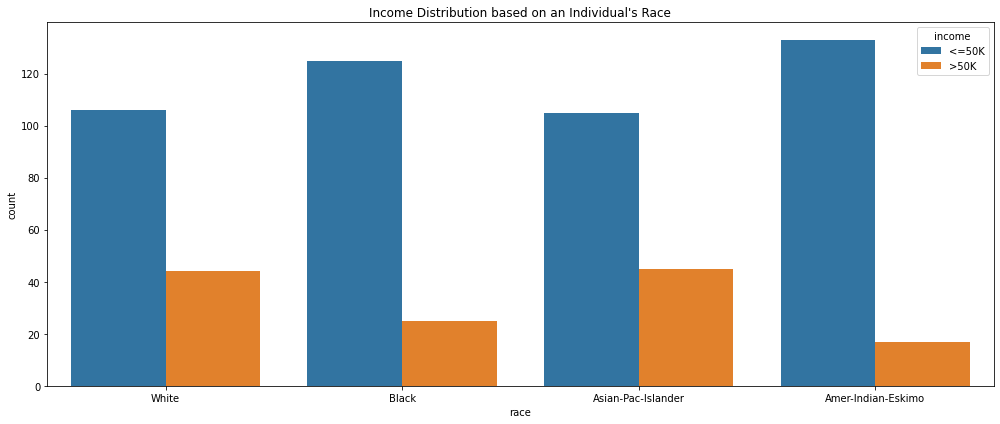

In [83]:
# Bar plot for income distribution by race
plt.figure(figsize=(14, 6))
sns.countplot(x='race', hue='income', data=sample_dataframe, order=sample_dataframe['race'].value_counts().index)
plt.title("Income Distribution based on an Individual's Race")
plt.tight_layout()
plt.show()

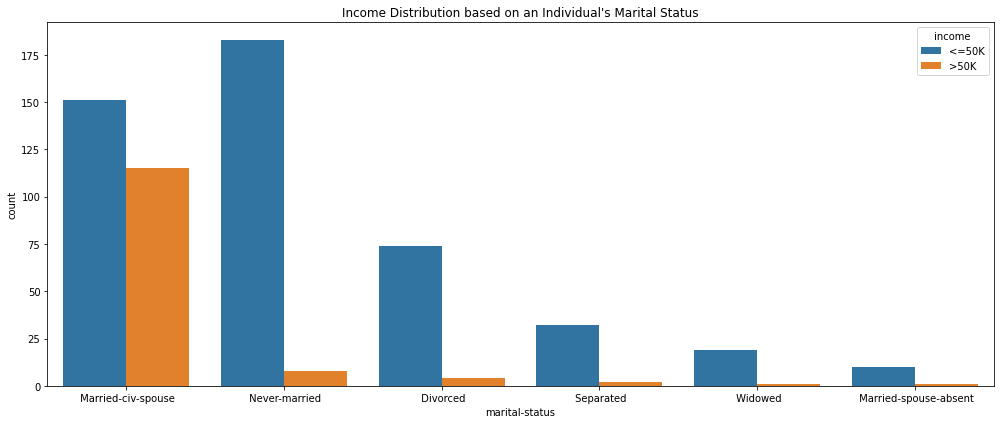

In [84]:
# Bar plot for income distribution by  marital status
plt.figure(figsize=(14, 6))
sns.countplot(x='marital-status', hue='income', data=sample_dataframe, order=sample_dataframe['marital-status'].value_counts().index)
plt.title("Income Distribution based on an Individual's Marital Status")
plt.tight_layout()
plt.show()

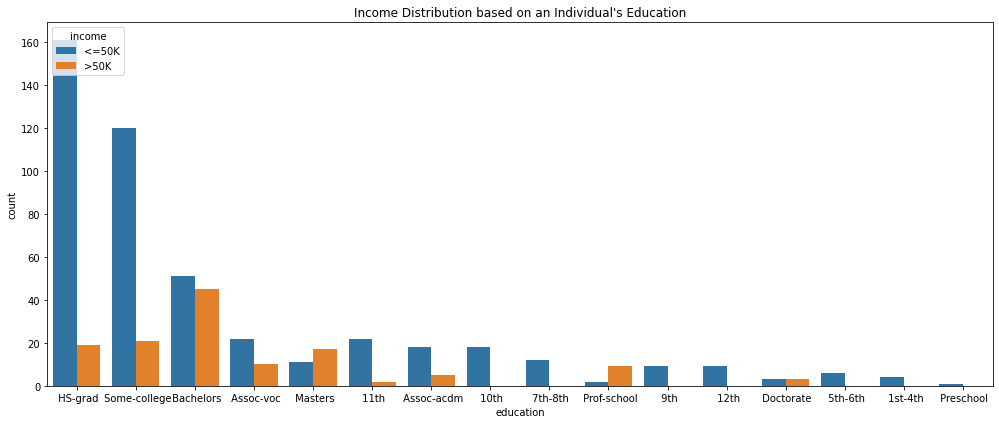

In [85]:
# Bar plot for income distribution by education
plt.figure(figsize=(14, 6))
sns.countplot(x='education', hue='income', data=sample_dataframe, order=sample_dataframe['education'].value_counts().index)
plt.title("Income Distribution based on an Individual's Education")
plt.tight_layout()
plt.show()

In [ ]:
#TODO: Complete Model Analysis Below